# The breakdown of the Phillips Curve

**Motivation for the project and relevans to economics**

This project is our data project where we create a Philips curve from historical data on inflation and employment in the US. In the 1960s the U.S. data showed a good correlation between unemplyment and inflation. However in the 1970s and onwards that relationship disappeared. We found it interesting to recreate the Philips curve from the 1960s with U.S. data but then also look at other periods in time to see if the correlation between inflation and unemployment has actually disappeared - this is not meant as a causal analysis, but just to explore an interesting concept that was widely belived to be true in the economics profession.

# Project setup

In [1]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# Getting data from API calls

## Getting U.S. Data (from FRED)

### Inflation

In [2]:
# Importing DataHelper to get data from API calls
import DataHelper

# Get data from API call
inflation_annual_US = DataHelper.inflation_annual_US()

# Display 10 random elements
#inflation_annual_US.head(10)

#### Descriptive statistics

<module 'matplotlib.pyplot' from '/Users/victorkristensen/anaconda3/lib/python3.11/site-packages/matplotlib/pyplot.py'>

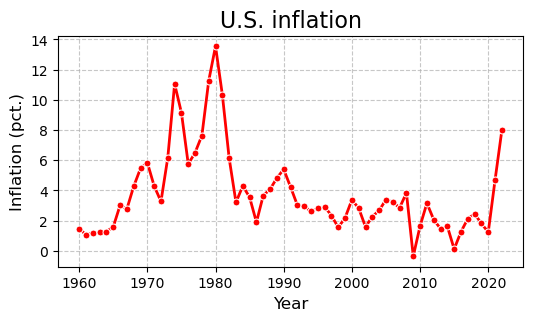

In [3]:
# Suppress FutureWarning about use_inf_as_na
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Importing the GraphHelper class to reuse the graph generating code
import GraphHelper

# Plot data
GraphHelper.line_plot_with_labels(
    inflation_annual_US, 
    "U.S. inflation", 
    "Year", 
    "Inflation (pct.)",
    "Year",
    "Inflation_US",
    color="red")

### Unemployment

In [4]:
# Get data from API call
unemployment_annual_US = DataHelper.unemployment_annual_US()

# Display 10 random elements
#unemployment_annual_US.head(10)

#### Descriptive statistics

<module 'matplotlib.pyplot' from '/Users/victorkristensen/anaconda3/lib/python3.11/site-packages/matplotlib/pyplot.py'>

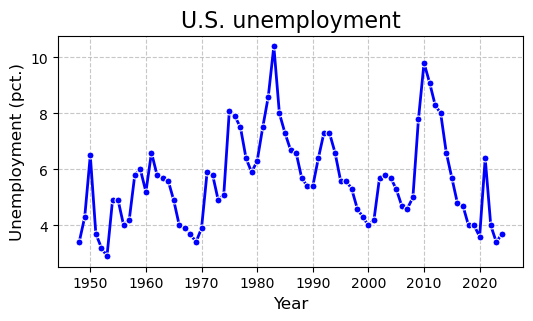

In [5]:
# Plot data
GraphHelper.line_plot_with_labels(
    unemployment_annual_US, 
    "U.S. unemployment", 
    "Year", 
    "Unemployment (pct.)",
    "Year",
    "Unemployment_US",
    color="blue")

## Getting DK Data (from DST and FRED)

### Inflation DK

In [6]:
# Importing DataHelper to get data from API calls
import DataHelper

# Get inflation data from API call
inflation_annual_DK = DataHelper.inflation_annual_DK()

# Show 10 random elements
#inflation_annual_DK.sample(10)

#### Descriptive statistics

<module 'matplotlib.pyplot' from '/Users/victorkristensen/anaconda3/lib/python3.11/site-packages/matplotlib/pyplot.py'>

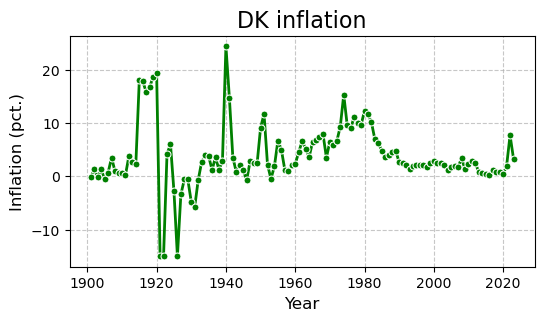

In [7]:
# Plot data
GraphHelper.line_plot_with_labels(
    inflation_annual_DK, 
    "DK inflation", 
    "Year", 
    "Inflation (pct.)",
    "Year",
    "Inflation_DK",
    color="green")

### Unemployment DK


In [8]:
# Get inflation data from API call
unemployment_annual_DK = DataHelper.unemployment_annual_DK()

# Show 10 random elements
#unemployment_annual_DK.sample(10)

#### Descriptive statistics

<module 'matplotlib.pyplot' from '/Users/victorkristensen/anaconda3/lib/python3.11/site-packages/matplotlib/pyplot.py'>

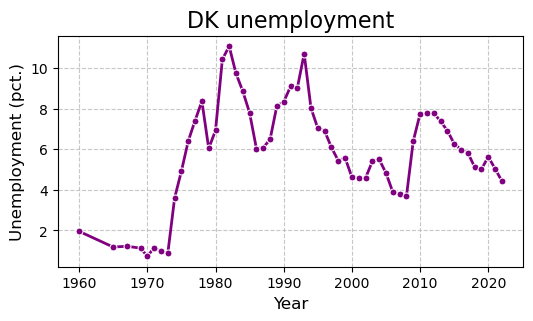

In [9]:
# Plot data
GraphHelper.line_plot_with_labels(
    unemployment_annual_DK, 
    "DK unemployment", 
    "Year", 
    "Unemployment (pct.)",
    "Year",
    "Unemployment_DK",
    color="purple")

# Merge datasets to one big dataset

In [10]:
# Calling the merged data function
merged_df = DataHelper.merged_data()

# Showing a sample of the merged data df
merged_df.sample(10)

,Year,Inflation_US,Unemployment_US,Inflation_DK,Unemployment_DK
27,1987,3.664563,6.6,4.0,6.090247
32,1992,3.028820,7.3,2.1,9.026292
54,2014,1.622223,6.6,0.6,6.925798
39,1999,2.188027,4.3,2.5,5.586690
4,1964,1.278912,5.6,3.6,NaN
23,1983,3.212435,10.4,6.9,9.743647
19,1979,11.254471,5.9,9.6,6.047766
30,1990,5.397956,5.4,2.6,8.338223
42,2002,1.586032,5.7,2.4,4.586738
18,1978,7.630964,6.4,10.0,8.375934


# Phillips-Curve with U.S. Data from the 1960s

<module 'matplotlib.pyplot' from '/Users/victorkristensen/anaconda3/lib/python3.11/site-packages/matplotlib/pyplot.py'>

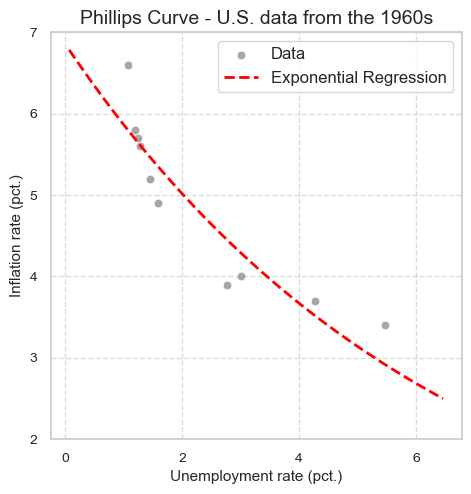

In [11]:
import GraphHelper

# Filter data for years between 1960 and 1970
merged_df = merged_df[(merged_df['Year'] < 1970)]
#merged_df.tail(20)

#Plot data
GraphHelper.plot_philips_curve_static(
    merged_df, 
    "Inflation_US",
    "Unemployment_US",
    "Phillips Curve - U.S. data from the 1960s")

The above Phillips curve is created with U.S. data from the 1960s. It can be seen that there is a relationship between the inflation and the unemployment rate. However after the 1960s the Phillips curve started to break down and the correlation between the two variables disappeared. In the rest of this project we've created a bunch of interactive plots where the reader can see if there are any other points in history where there has been as clear a relationship between the inflation and the unemployment rate as in the 1960s.

# Trying to find the Phillips Curve in newer data

## Looking at U.S. data over time

interactive(children=(IntRangeSlider(value=(1961, 2022), continuous_update=False, description='Years', max=202…

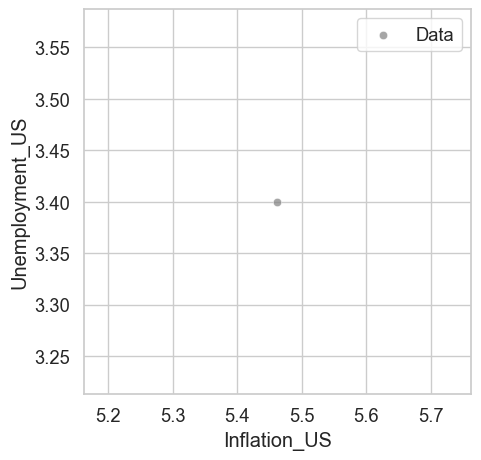

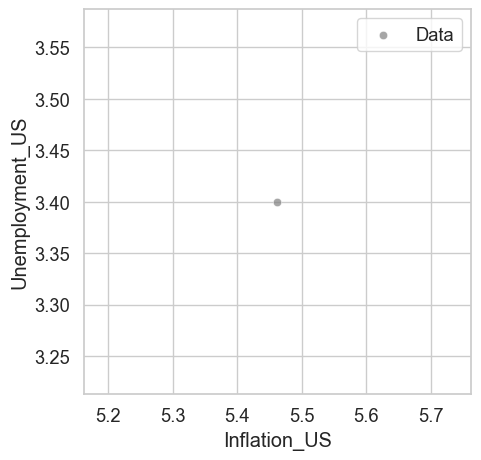

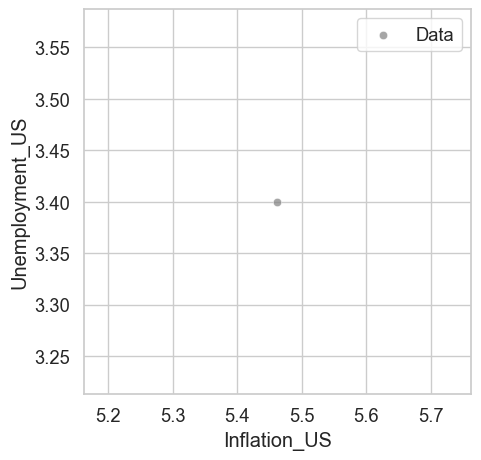

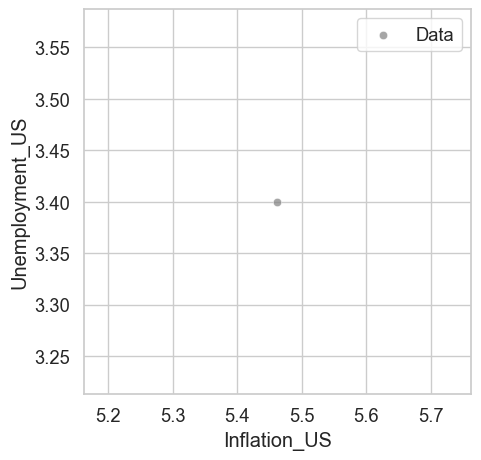

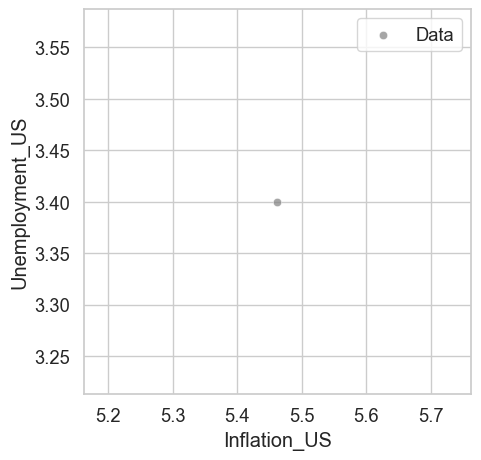

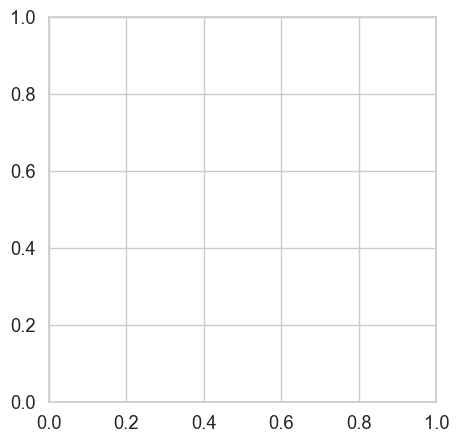

In [13]:
# Implement an interactive Phillips Curve
def _plot_timeseries(dataframe, years):
    
    # Filter observations where the year is not in the interval years
    dataframe = dataframe[dataframe['Year'] >= years[0]]
    dataframe = dataframe[dataframe['Year'] <= years[1]]

    #Plot data
    GraphHelper.plot_philips_curve_static(
        dataframe, 
        "Inflation_US",
        "Unemployment_US",
        "Phillips Curve")


def plot_timeseries(dataframe):
    
    widgets.interact(_plot_timeseries, 
    dataframe = widgets.fixed(dataframe),
    years=widgets.IntRangeSlider(
        description="Years",
        min=1961,
        max=2022,
        value=[1961, 2022],
        continuous_update=False,
    )                 
);

plot_timeseries(merged_df)

## Looking at data from Denmark over time

The data series for Denmark first starts in the 1970's since there is a data break on the unemployment data in the 1960s which makes it more difficult to use that part of the data.